<a href="https://colab.research.google.com/github/Azarbaad/Financial-Analysis/blob/main/Stock_Analysis_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'stock-market-dataset' dataset.
Path to dataset files: /kaggle/input/stock-market-dataset


## Purpose of analysis

*   Build moving average of varios stocks
*   Determine correlations between stock returns
*   Create an optimal portfolio
*   Try to predict the future behavior of the stocks

I choose 4 companeis :

NVIDIA Corporation - Ticker: NVDA
(World's largest company, ~$4.5+ trillion market cap, AI leader.)


Microsoft Corporation - Ticker: MSFT
(Strong in cloud/AI, consistently top 2-3.)


Apple Inc. - Ticker: AAPL
(Consumer tech giant.)


Amazon.com, Inc. - Ticker: AMZN
(E-commerce and AWS cloud powerhouse.)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime


In [ ]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [ ]:
# Four company for data extraction
company_list = ['NVDA', 'AAPL', 'MSFT', 'AMZN']

In [ ]:
import yfinance as yf

stocks = {}

for company in company_list:
    ticker = yf.Ticker(company)
    stocks[company] = ticker.history(start=year_ago, end=today)

In [ ]:
stocks['NVDA'].head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,135.962805,138.842022,134.593185,138.272171,198247200,0.0,0.0
2025-01-03 00:00:00-05:00,139.971709,144.860371,139.691787,144.430496,229322500,0.0,0.0
2025-01-06 00:00:00-05:00,148.549363,152.118394,147.779585,149.389130,265377400,0.0,0.0
2025-01-07 00:00:00-05:00,152.988143,153.088122,139.971700,140.101669,351782200,0.0,0.0
2025-01-08 00:00:00-05:00,142.541012,143.910632,137.522380,140.071686,227349900,0.0,0.0


In [ ]:
stocks['AAPL'].head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,247.809220,247.978468,240.731247,242.752106,55740700,0.0,0.0
2025-01-03 00:00:00-05:00,242.264297,243.080598,240.800915,242.264297,40244100,0.0,0.0
2025-01-06 00:00:00-05:00,243.210016,246.216423,242.105013,243.896912,45045600,0.0,0.0
2025-01-07 00:00:00-05:00,241.886014,244.444450,240.263363,241.119492,40856000,0.0,0.0
2025-01-08 00:00:00-05:00,240.830767,242.612716,238.969192,241.607254,37628900,0.0,0.0


In [ ]:
stocks['MSFT'].head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,422.413951,422.950005,411.812165,415.514832,16896500,0.0,0.0
2025-01-03 00:00:00-05:00,417.996512,420.924922,416.467811,420.249908,16662900,0.0,0.0
2025-01-06 00:00:00-05:00,424.865845,431.139572,422.364309,424.716949,20573600,0.0,0.0
2025-01-07 00:00:00-05:00,425.858555,427.496466,417.718589,419.277100,18139100,0.0,0.0
2025-01-08 00:00:00-05:00,420.359068,423.843375,418.453145,421.451019,15054600,0.0,0.0


In [ ]:
stocks['AMZN'].head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-05:00,222.029999,225.149994,218.190002,220.220001,33956600,0.0,0.0
2025-01-03 00:00:00-05:00,222.509995,225.360001,221.619995,224.190002,27515600,0.0,0.0
2025-01-06 00:00:00-05:00,226.779999,228.839996,224.839996,227.610001,31849800,0.0,0.0
2025-01-07 00:00:00-05:00,227.899994,228.380005,221.460007,222.110001,28084200,0.0,0.0
2025-01-08 00:00:00-05:00,223.190002,223.520004,220.199997,222.130005,25033300,0.0,0.0


In [ ]:
stocks['NVDA'].info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2025-01-02 00:00:00-05:00  135.962805  138.842022  134.593185  138.272171   
2025-01-03 00:00:00-05:00  139.971709  144.860371  139.691787  144.430496   
2025-01-06 00:00:00-05:00  148.549363  152.118394  147.779585  149.389130   
2025-01-07 00:00:00-05:00  152.988143  153.088122  139.971700  140.101669   
2025-01-08 00:00:00-05:00  142.541012  143.910632  137.522380  140.071686   
...                               ...         ...         ...         ...   
2025-12-26 00:00:00-05:00  189.919998  192.690002  188.000000  190.529999   
2025-12-29 00:00:00-05:00  187.710007  188.759995  185.910004  188.220001   
2025-12-30 00:00:00-05:00  188.240005  188.990005  186.929993  187.539993   
2025-12-31 00:00:00-05:00  189.570007  190.559998  186.490005  186.500000   
2026-01-02 00:00:00-05:00  189.824997  192.929901  188.289993  189.539993   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-01-02 00:00:00-05:00  198247200        0.0           0.0  
2025-01-03 00:00:00-05:00  229322500        0.0           0.0  
2025-01-06 00:00:00-05:00  265377400        0.0           0.0  
2025-01-07 00:00:00-05:00  351782200        0.0           0.0  
2025-01-08 00:00:00-05:00  227349900        0.0           0.0  
...                              ...        ...           ...  
2025-12-26 00:00:00-05:00  139740300        0.0           0.0  
2025-12-29 00:00:00-05:00  120006100        0.0           0.0  
2025-12-30 00:00:00-05:00   97687300        0.0           0.0  
2025-12-31 00:00:00-05:00  120100500        0.0           0.0  
2026-01-02 00:00:00-05:00   71889296        0.0           0.0  

[251 rows x 7 columns]>

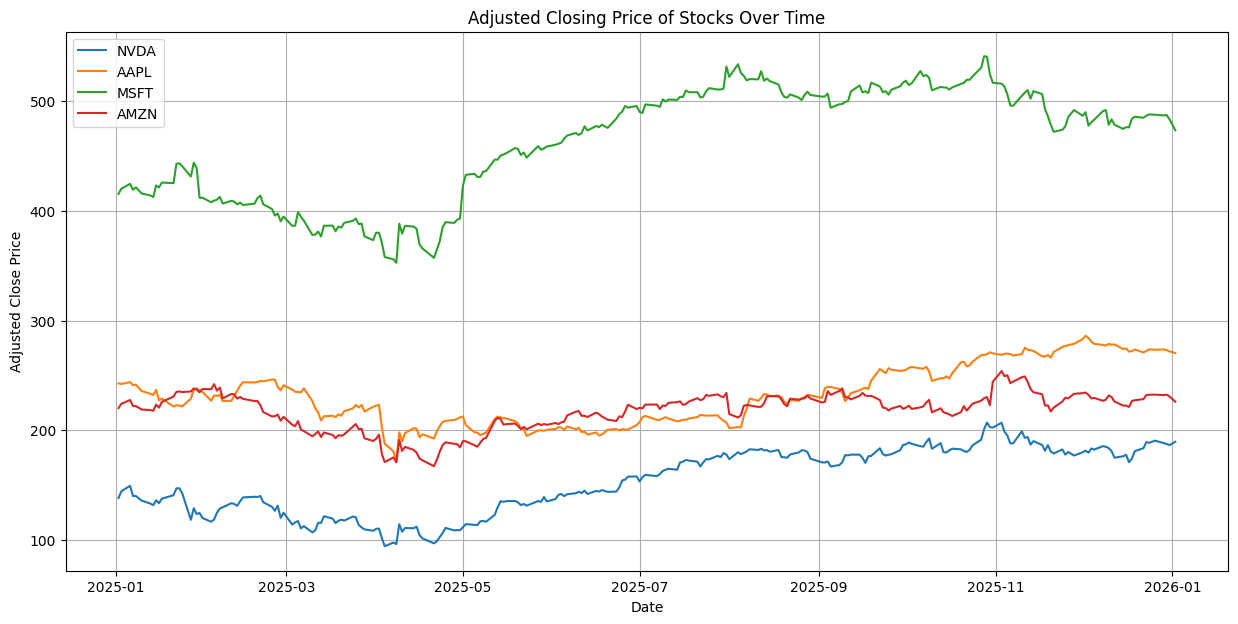

In [ ]:
plt.figure(figsize=(15, 7))

for company in company_list:
    plt.plot(stocks[company]['Close'], label=company)

plt.title('Adjusted Closing Price of Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Moving average
Moving average - function whose value at each point is equal to some average value of the original function for the previous period.

why we need it: it reveals the underlying trend

##Trend direction

Price above MA → bullish bias

Price below MA → bearish bias

Formula for calculations:

SUM = sum of prices for past x days; MA = SUM / x

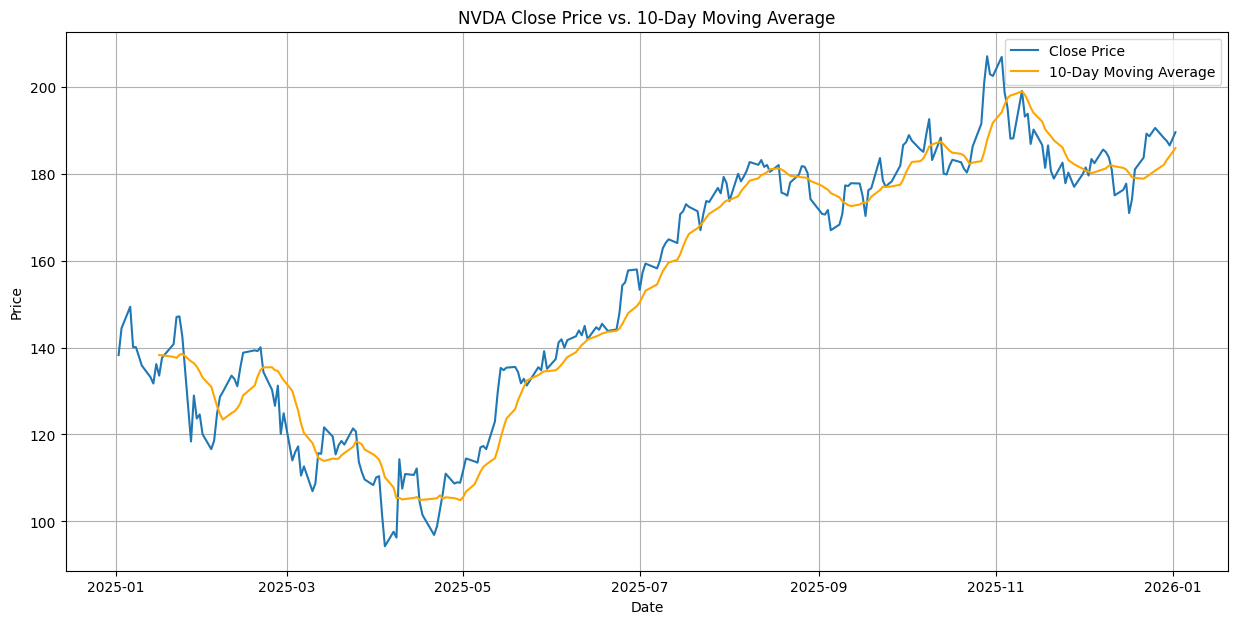

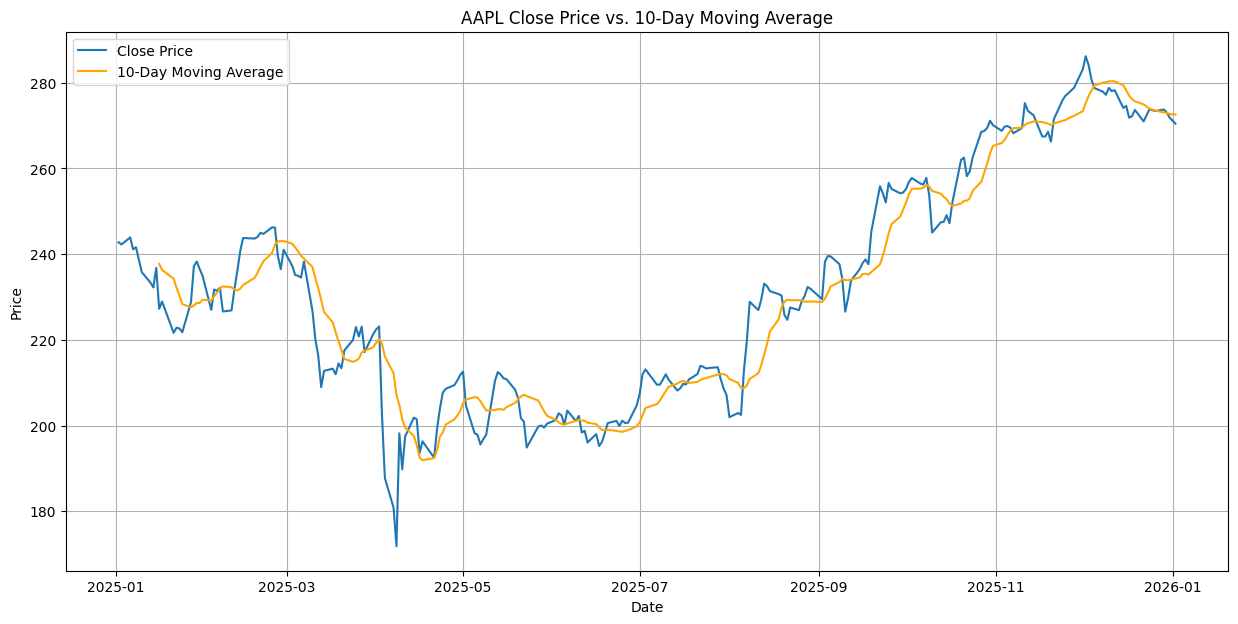

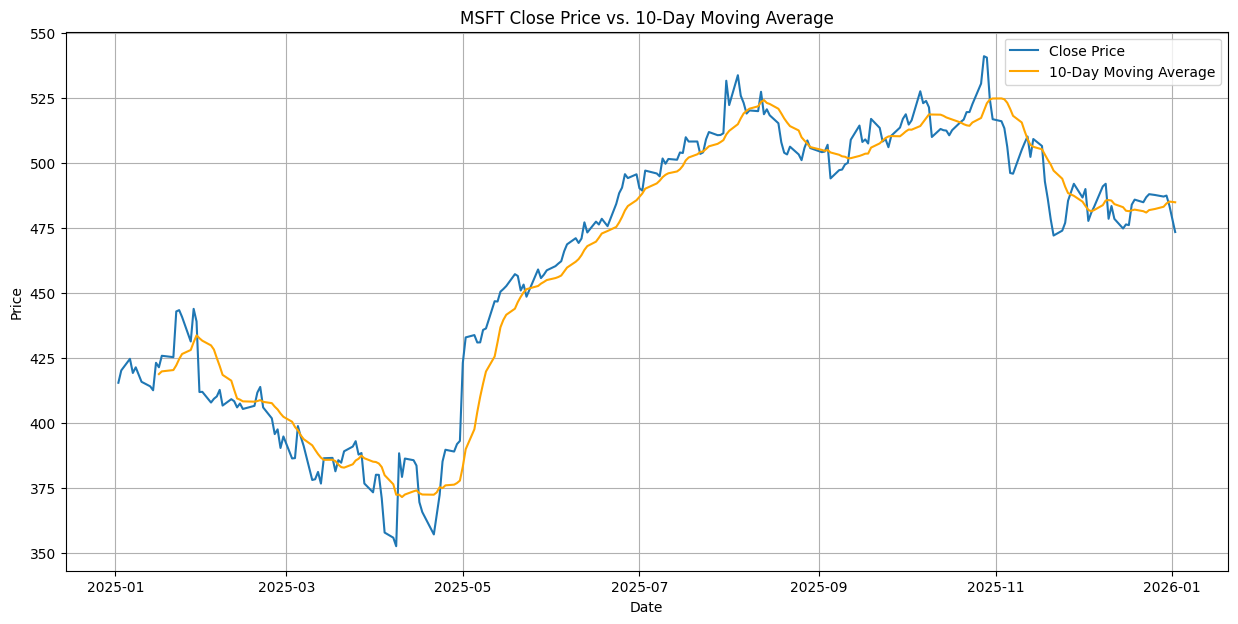

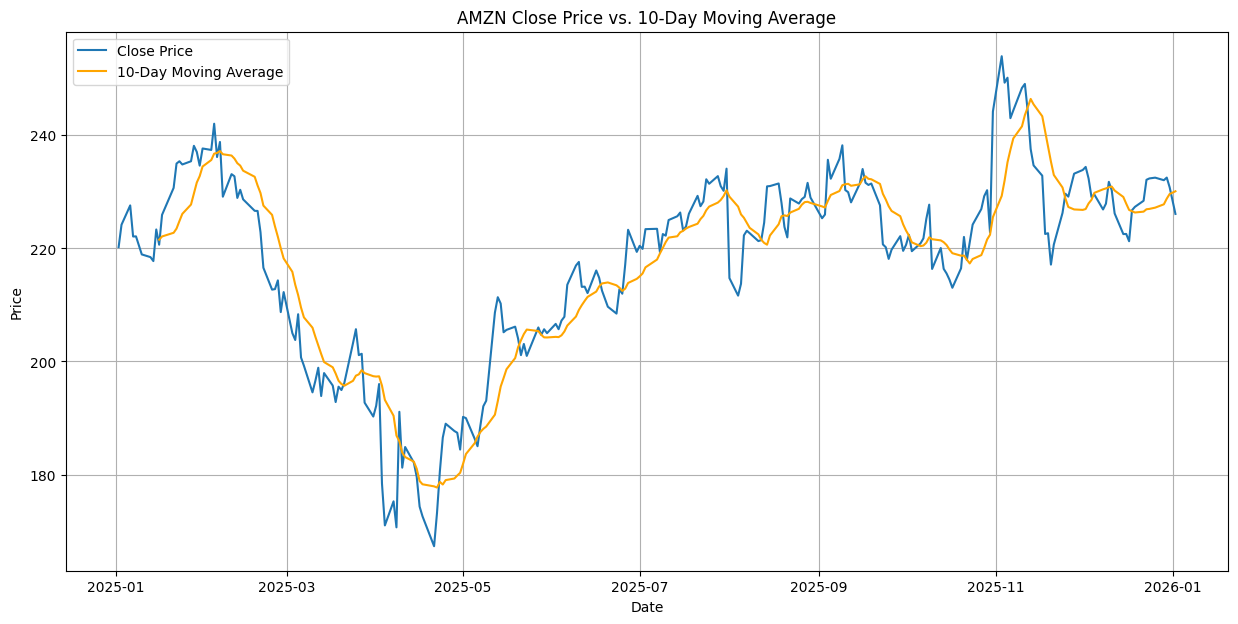

In [ ]:
for company in company_list:
    stocks[company]['Moving Average_10_days'] = stocks[company]['Close'].rolling(window=10).mean()

# Plotting each company's stock separately
for company in company_list:
    plt.figure(figsize=(15, 7))
    plt.plot(stocks[company]['Close'], label='Close Price')
    plt.plot(stocks[company]['Moving Average_10_days'], label='10-Day Moving Average', color='orange')
    plt.title(f'{company} Close Price vs. 10-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

##Strong Bullish Momentum in NVDA and MSFT:

Both NVIDIA (NVDA) and Microsoft (MSFT) display sustained periods where their closing prices remain consistently above their 10-day moving averages. For an experienced trader, this typically signals strong underlying bullish momentum. Brief pullbacks towards the 10-day MA could be interpreted as potential buying opportunities within an established uptrend, as the MA often acts as dynamic support.

##Short-term Volatility and Consolidation in AAPL and AMZN:

Apple (AAPL) and Amazon (AMZN), while generally showing an upward trajectory, exhibit more frequent crossings and interactions with their 10-day moving averages. This suggests higher short-term volatility or periods of consolidation, where the immediate trend is less decisive. An experienced short-term trader might find a simple 10-day MA less effective for clear directional signals in such conditions and might combine it with other indicators or look for range-bound trading opportunities.

##Differential Relative Strength:

Visually comparing the four stocks, NVDA and MSFT appear to demonstrate more robust and sustained separation from their 10-day MAs, indicating stronger short-term relative strength within the observed period. An experienced investor might use this to assess which stocks are currently leading in performance or to inform adjustments in portfolio allocation, potentially favoring those showing more consistent strength, or investigating the fundamental drivers behind this differential performance.

In [ ]:
for company in company_list:
    stocks[company]['Daily Return'] = stocks[company]['Close'].pct_change()

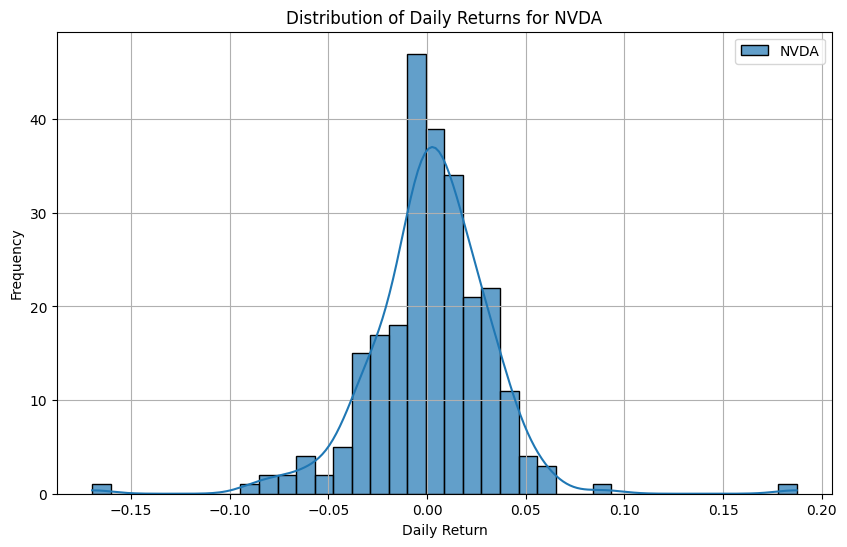

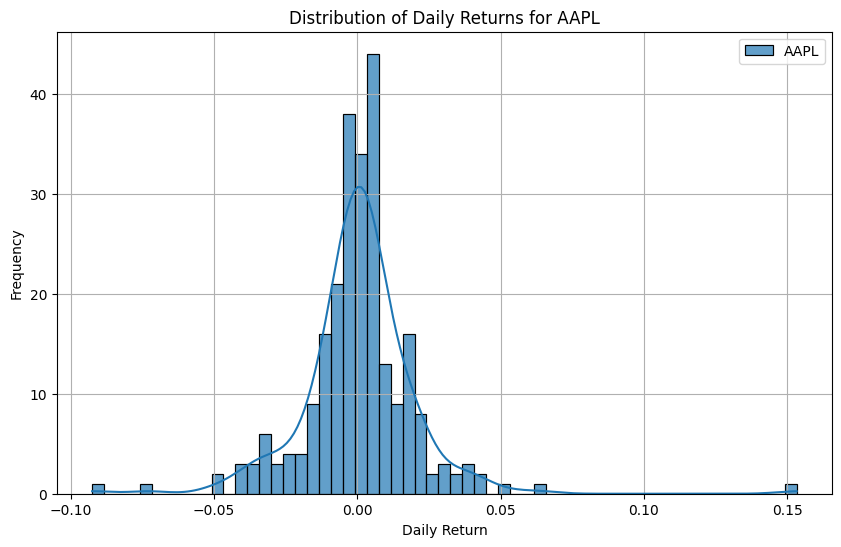

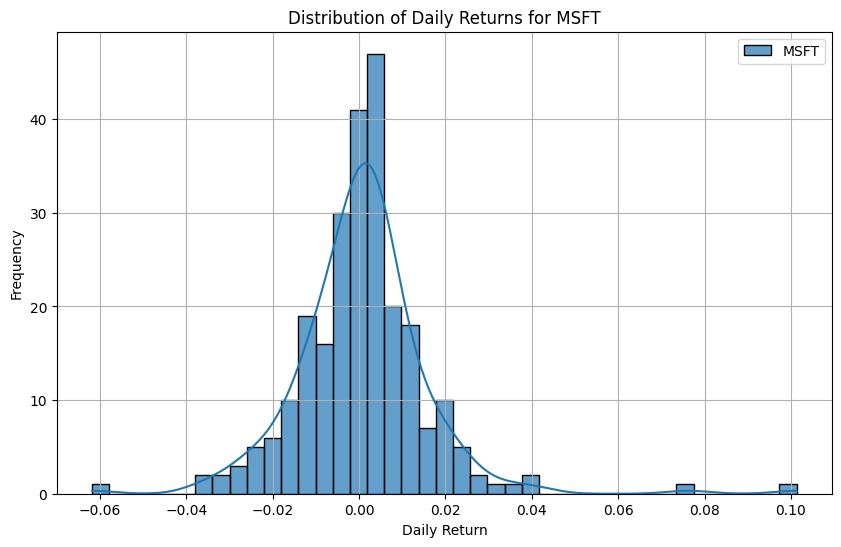

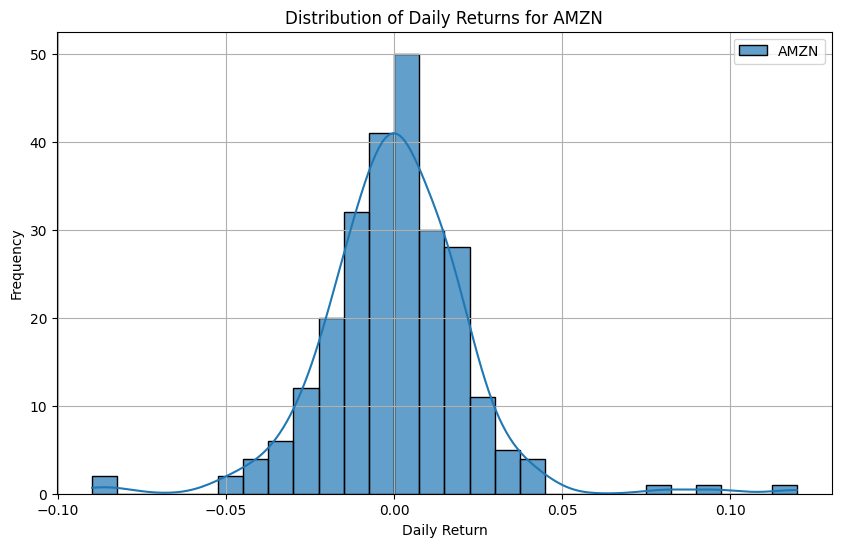

In [ ]:
for company in company_list:
    plt.figure(figsize=(10, 6)) # Create a new figure for each company
    sns.histplot(stocks[company]['Daily Return'].dropna(), kde=True, label=company, alpha=0.7)
    plt.title(f'Distribution of Daily Returns for {company}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

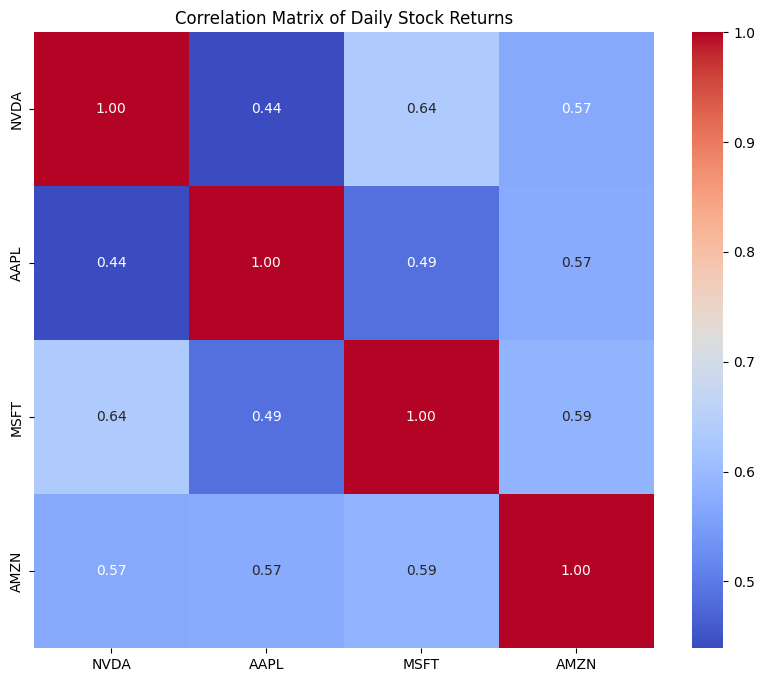

In [ ]:
daily_returns = pd.DataFrame({company: stocks[company]['Daily Return'] for company in company_list})

correlation_matrix = daily_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Stock Returns')
plt.show()

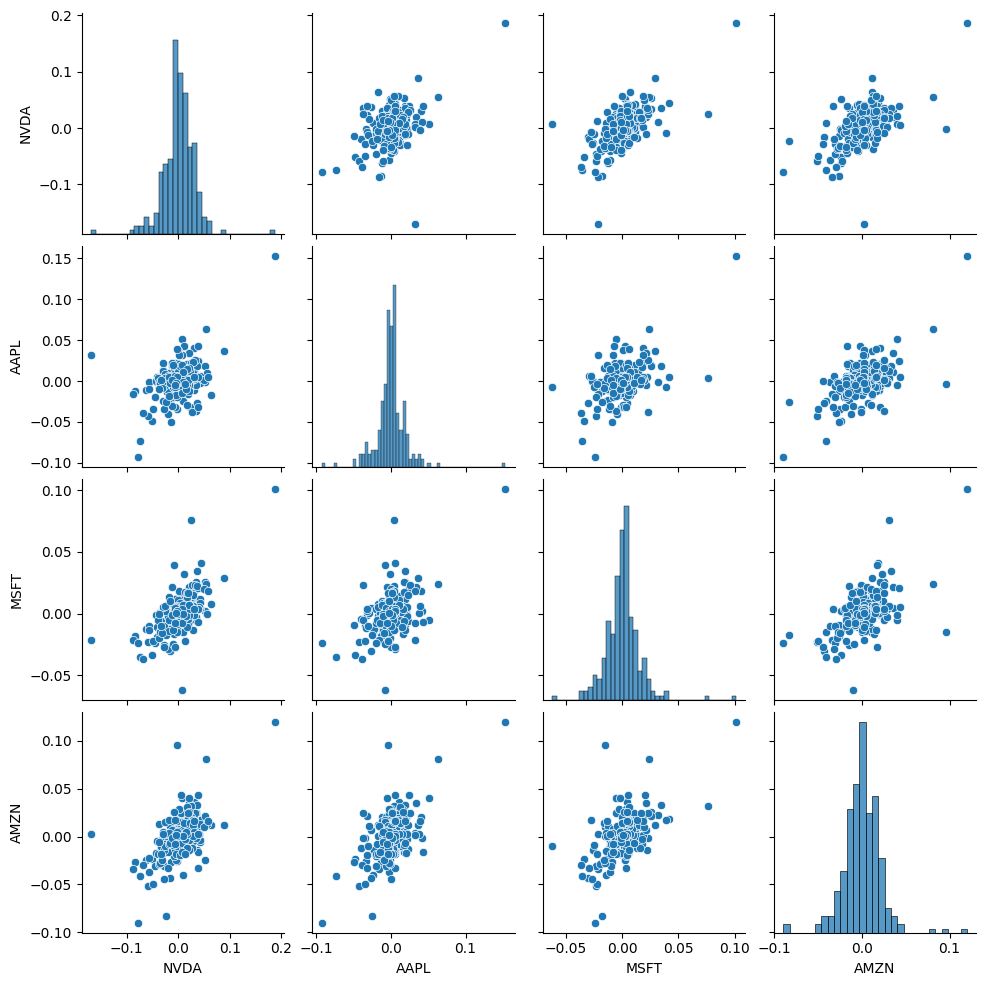

In [ ]:
import seaborn as sns
import pandas as pd
import yfinance as yf
from datetime import datetime

# Re-define company_list to ensure it's available
company_list = ['NVDA', 'AAPL', 'MSFT', 'AMZN']

# Redefine today and year_ago
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

# Redefine stocks dictionary
stocks = {}
for company in company_list:
    ticker = yf.Ticker(company)
    stocks[company] = ticker.history(start=year_ago, end=today)

# Calculate Daily Return after re-fetching stock data
for company in company_list:
    stocks[company]['Daily Return'] = stocks[company]['Close'].pct_change()

daily_returns = pd.DataFrame({company: stocks[company]['Daily Return'] for company in company_list})
sns.pairplot(daily_returns.dropna())

The plot above is a Pair Plot which shows  the relationships between the daily returns.

## Diagonal Plots (Histograms/KDEs)

 The plots along the diagonal (e.g., NVDA vs. NVDA, AAPL vs. AAPL) are histograms (or Kernel Density Estimates) for each individual stock's daily return. They show the distribution of daily returns for that specific company. For example, you can see if the returns are clustered around zero, if there are fat tails (more extreme returns), or if the distribution is skewed.

## Off-Diagonal Plots (Scatter Plots):

 The plots off the diagonal (e.g., NVDA vs. AAPL, MSFT vs. AMZN) are scatter plots. Each scatter plot visualizes the relationship between the daily returns of two different stocks. For instance, the plot at the intersection of the 'NVDA' row and 'MSFT' column shows how NVDA's daily returns correlate with MSFT's daily returns. If the points generally trend upwards from left to right, it indicates a positive correlation (they tend to move in the same direction). If they trend downwards, it's a negative correlation. A scattered cloud of points suggests little to no correlation.

# Monte Carlo method to preict price behavior

The **Monte Carlo** method is an excellent way to simulate potential future stock price movements by considering historical volatility and returns. It involves generating many random possible price paths to estimate the probability distribution of future prices.

**Prepare Data for Monte Carlo Simulation:** Select a stock (e.g., NVDA) and retrieve its historical closing prices. Calculate the logarithmic daily returns from the closing prices. This is a common practice in financial modeling as log returns are more symmetrically distributed and easier to work with for these simulations.

**Calculate Key Parameters:** Calculate the mean (average) and standard deviation of the logarithmic daily returns. These will be used as inputs to model the random daily fluctuations in the Monte Carlo simulation.

**Set Monte Carlo Simulation Parameters:** Define the number of simulation paths (e.g., 1000) and the number of trading days into the future you want to predict (e.g., 252 days for one year). Also, get the last known closing price of the selected stock as the starting point for the simulations.

**Run Monte Carlo Simulation:** Execute the Monte Carlo simulation. For each simulation path, generate a series of random daily returns based on the calculated mean and standard deviation. Apply these random returns sequentially to the last known closing price to project a future price path. Repeat this for all defined simulation paths.

**Visualize Monte Carlo Simulation Results:** Plot all the simulated future price paths on a single chart. This visualization will show a range of possible price movements, giving an idea of the potential future price distribution and volatility. Add a title and axis labels for clarity.

**Final Task:** Provide a summary of the Monte Carlo simulation results and the generated plot, explaining what the various price paths represent.


## Prepare Data for Monte Carlo Simulation

we select a stock (e.g., NVDA) and retrieve its historical closing prices. Calculate the logarithmic daily returns from the closing prices. This is a common practice in financial modeling as log returns are more symmetrically distributed and easier to work with for these simulations.



First, I will extract the 'Close' prices for 'NVDA' from the `stocks` dictionary, then calculate the logarithmic daily returns, and finally, remove any NaN values.



In [ ]:
nvda_close_prices = stocks['NVDA']['Close']
nvda_log_returns = np.log(nvda_close_prices / nvda_close_prices.shift(1))
nvda_log_returns = nvda_log_returns.dropna()
print("NVDA Close Prices (first 5 rows):\n", nvda_close_prices.head())
print("\nNVDA Log Daily Returns (first 5 rows):\n", nvda_log_returns.head())

NVDA Close Prices (first 5 rows):
 Date
2025-01-03 00:00:00-05:00    144.430496
2025-01-06 00:00:00-05:00    149.389130
2025-01-07 00:00:00-05:00    140.101669
2025-01-08 00:00:00-05:00    140.071686
2025-01-10 00:00:00-05:00    135.872849
Name: Close, dtype: float64

NVDA Log Daily Returns (first 5 rows):
 Date
2025-01-06 00:00:00-05:00    0.033756
2025-01-07 00:00:00-05:00   -0.064186
2025-01-08 00:00:00-05:00   -0.000214
2025-01-10 00:00:00-05:00   -0.030435
2025-01-13 00:00:00-05:00   -0.019916
Name: Close, dtype: float64



The previous cell failed because 'np' was not defined, indicating that the `numpy` library was not imported. I need to add `import numpy as np` to resolve this `NameError`.



In [ ]:
import numpy as np
nvda_close_prices = stocks['NVDA']['Close']
nvda_log_returns = np.log(nvda_close_prices / nvda_close_prices.shift(1))
nvda_log_returns = nvda_log_returns.dropna()
print("NVDA Close Prices (first 5 rows):\n", nvda_close_prices.head())
print("\nNVDA Log Daily Returns (first 5 rows):\n", nvda_log_returns.head())

NVDA Close Prices (first 5 rows):
 Date
2025-01-03 00:00:00-05:00    144.430496
2025-01-06 00:00:00-05:00    149.389130
2025-01-07 00:00:00-05:00    140.101669
2025-01-08 00:00:00-05:00    140.071686
2025-01-10 00:00:00-05:00    135.872849
Name: Close, dtype: float64

NVDA Log Daily Returns (first 5 rows):
 Date
2025-01-06 00:00:00-05:00    0.033756
2025-01-07 00:00:00-05:00   -0.064186
2025-01-08 00:00:00-05:00   -0.000214
2025-01-10 00:00:00-05:00   -0.030435
2025-01-13 00:00:00-05:00   -0.019916
Name: Close, dtype: float64



Now that the logarithmic daily returns for NVDA have been calculated, the next step is to determine their mean and standard deviation, which are essential parameters for the Monte Carlo simulation.



In [ ]:
log_return_mean = nvda_log_returns.mean()
log_return_std = nvda_log_returns.std()
print(f"Mean of NVDA Log Daily Returns: {log_return_mean:.6f}")
print(f"Standard Deviation of NVDA Log Daily Returns: {log_return_std:.6f}")

Mean of NVDA Log Daily Returns: 0.001077
Standard Deviation of NVDA Log Daily Returns: 0.031291


## Set Monte Carlo Simulation Parameters


I define the number of simulation paths and the number of future trading days for the Monte Carlo simulation. Also, I identify the last known closing price of the selected stock (NVDA) to serve as the starting point.



To prepare for the Monte Carlo simulation, I will define the number of simulation paths, the number of future trading days, and retrieve the last known closing price of NVDA.



In [ ]:
num_simulations = 1000
num_trading_days = 252
last_price = nvda_close_prices.iloc[-1]

print(f"Number of Simulations: {num_simulations}")
print(f"Number of Trading Days: {num_trading_days}")
print(f"Last Known NVDA Closing Price: {last_price:.2f}")

Number of Simulations: 1000
Number of Trading Days: 252
Last Known NVDA Closing Price: 188.85


## Run Monte Carlo Simulation


I execute the Monte Carlo simulation by generating random daily returns and projecting future price paths for NVDA.



I will execute the Monte Carlo simulation by generating random daily returns and projecting future price paths for NVDA, storing all simulated paths in a NumPy array.



In [ ]:
simulated_price_paths = np.zeros((num_trading_days + 1, num_simulations))

for i in range(num_simulations):
    # Each simulation starts with the last known price
    simulated_price_paths[0, i] = last_price
    for t in range(1, num_trading_days + 1):
        # Generate a random daily return using a normal distribution
        random_return = np.random.normal(log_return_mean, log_return_std)
        # Calculate the next day's price
        simulated_price_paths[t, i] = simulated_price_paths[t-1, i] * np.exp(random_return)

print("Monte Carlo simulation complete. Generated a 2D array of simulated price paths.")
print(f"Shape of simulated_price_paths: {simulated_price_paths.shape}")

Monte Carlo simulation complete. Generated a 2D array of simulated price paths.
Shape of simulated_price_paths: (253, 1000)


## Visualize Monte Carlo Simulation Results


I plot all the simulated future price paths on a single chart, adding a title and axis labels for clarity.


## Visualize Monte Carlo Simulation Results


I plot all the simulated future price paths on a single chart, adding a title and axis labels for clarity.


To visualize the Monte Carlo simulation results, I will generate a plot showing all simulated price paths with appropriate titles and labels as per the instructions.



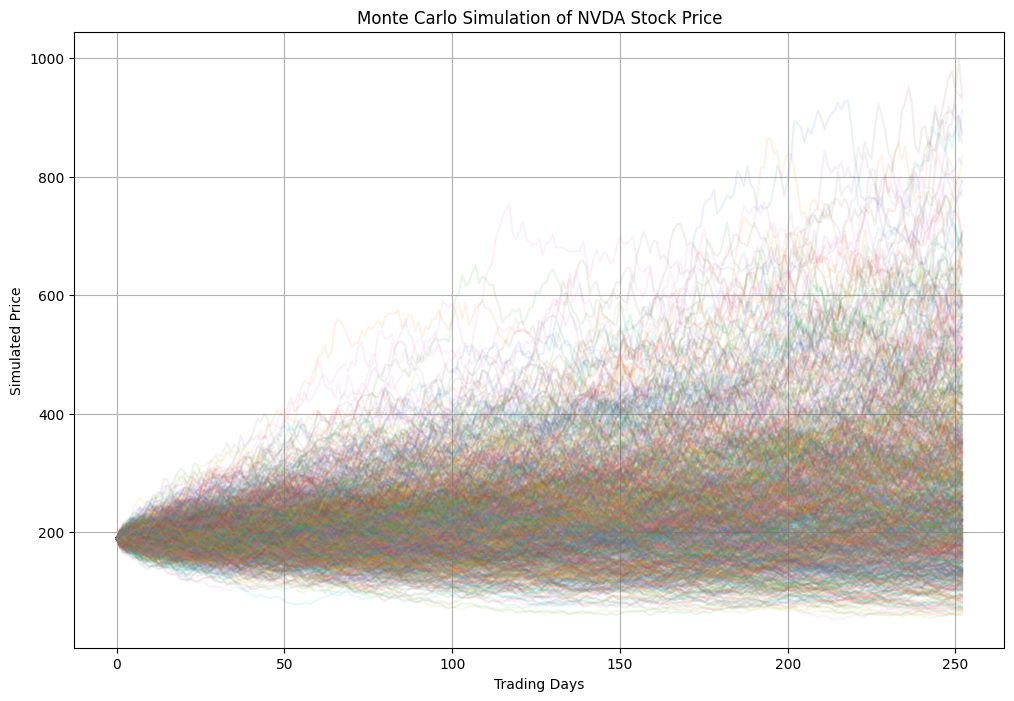

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(num_simulations):
    plt.plot(simulated_price_paths[:, i], alpha=0.1)

plt.title('Monte Carlo Simulation of NVDA Stock Price')
plt.xlabel('Trading Days')
plt.ylabel('Simulated Price')
plt.grid(True)
plt.show()

## Summary of Monte Carlo Simulation Results

The Monte Carlo simulation provides a probabilistic forecast of NVDA's future stock price based on its historical daily returns' mean and standard deviation. Each line on the plot represents one possible future price path, generated by sequentially applying random daily returns drawn from a normal distribution defined by the historical log returns.

**Potential Future Price Distribution:**
The multitude of paths collectively forms a distribution of potential future prices. At any given future trading day, the spread of these paths indicates the range of prices NVDA could reach. The density of the paths shows where prices are more likely to converge, while the outer boundaries suggest less probable, more extreme outcomes. This allows us to estimate the likelihood of the stock reaching certain price levels.

**Volatility:**
The width of the fan-like spread of the simulated paths directly reflects the inherent volatility of NVDA's stock. A wider spread indicates higher expected volatility, meaning the stock price could fluctuate more dramatically. Conversely, a narrower spread would suggest lower expected volatility. The simulation captures how this historical volatility could manifest in future price movements, creating a cone of uncertainty around the stock's trajectory.

## Summary:

### Data Analysis Key Findings
*   Logarithmic daily returns for NVDA were calculated from historical closing prices. The mean of these returns was `0.001077`, and the standard deviation was `0.031291`.
*   The Monte Carlo simulation was configured with `1000` simulation paths over `252` future trading days, starting from NVDA's last known closing price of `$188.85`.
*   The simulation successfully generated `1000` distinct future price paths, each spanning `253` time steps (including the starting price).
*   The visualization displays all simulated price paths, demonstrating the potential distribution of future prices and the stock's expected volatility over the simulated period.

### Q&A
*   **What do the various price paths represent in terms of potential future price distribution and volatility?**
    The multiple price paths generated by the Monte Carlo simulation collectively illustrate a probabilistic forecast of NVDA's future stock price. The spread of these paths at any given future trading day indicates the potential range of prices the stock could reach, forming a distribution where denser areas suggest more likely price levels and outer boundaries represent less probable, more extreme outcomes. The width of this fan-like spread directly reflects the stock's inherent volatility; a wider spread implies higher expected volatility and greater potential for dramatic price fluctuations, while a narrower spread suggests lower expected volatility.




